In [1]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
import os

In [2]:
data = pd.read_csv('../summary_data/TCRA_simulated.csv')
print(data.columns)
data["Trim Effeciency"] = data["Base - TP TRIM"]/(data["Base - TP TRIM"] + data["Base - FP TRIM"])
data['total_corrections']=data['Base - TP']+ data['Base - FP']
data = data[(data['Kmer Size'] >19)]
data.head()

Index(['Unnamed: 0', 'EC Filename', 'Wrapper Name', 'Kmer Size', 'Read - TP',
       'Read - TN', 'Read - FN', 'Read - FN WRONG', 'Read - FP',
       'Read - FP INDEL', 'Total Trimmed Reads', 'Total Reads', 'Base - TP',
       'Base - TN', 'Base - FN', 'Base - FN WRONG', 'Base - FP',
       'Base - FP INDEL', 'Base - FP TRIM', 'Base - TP TRIM', 'Total Bases',
       'Tool', 'Coverage', 'Length', 'Base Sensitivity', 'Base Precision',
       'Base Gain', 'Base Accuracy', 'Dataset', 'Trim Percent',
       'Trim Effeciency'],
      dtype='object')


,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency,total_corrections
5,24,bfc_TRA.rep.seq_sim_rl_100_cov_1_1_20.correcte...,run.bfc.sh,20,1257,737,3399,5,208,0,...,1,100L,0.331761,0.885300,0.288778,0.985721,TRA,0.0,NaN,4211
7,26,bfc_TRA.rep.seq_sim_rl_100_cov_2_1_20.correcte...,run.bfc.sh,20,2262,1628,7995,4,209,0,...,2,100L,0.260215,0.925148,0.239161,0.984872,TRA,0.0,NaN,6760
9,28,bfc_TRA.rep.seq_sim_rl_100_cov_4_1_20.correcte...,run.bfc.sh,20,3287,3091,17585,10,245,2,...,4,100L,0.176208,0.940620,0.165084,0.983258,TRA,0.0,NaN,9090
11,30,bfc_TRA.rep.seq_sim_rl_100_cov_1_1_21.correcte...,run.bfc.sh,21,1580,736,3122,4,164,0,...,1,100L,0.374577,0.902617,0.334164,0.986629,TRA,0.0,NaN,4662
12,31,bfc_TRA.rep.seq_sim_rl_100_cov_2_1_21.correcte...,run.bfc.sh,21,2747,1633,7551,6,161,0,...,2,100L,0.290481,0.950191,0.275254,0.985589,TRA,0.0,NaN,7348


In [3]:
color_dict=dict({'Bfc':'purple','Bless':'orange','Coral':'brown','Fiona':'gray','Lighter':'pink','Musket':'blue','Pollux':'yellow','Racer':'green','Reckoner':'red','Sga':'black'})
print (color_dict)

{'Bfc': 'purple', 'Bless': 'orange', 'Coral': 'brown', 'Fiona': 'gray', 'Lighter': 'pink', 'Musket': 'blue', 'Pollux': 'yellow', 'Racer': 'green', 'Reckoner': 'red', 'Sga': 'black'}


In [4]:
data = data[(data['Kmer Size'] ==20) | (data['Kmer Size'] ==22) | (data['Kmer Size'] ==24)| (data['Kmer Size'] ==26) 
           |  (data['Kmer Size'] ==28) |  (data['Kmer Size'] ==30) & (data['Tool']!='Racer')]

data.head()

,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency,total_corrections
5,24,bfc_TRA.rep.seq_sim_rl_100_cov_1_1_20.correcte...,run.bfc.sh,20,1257,737,3399,5,208,0,...,1,100L,0.331761,0.885300,0.288778,0.985721,TRA,0.0,NaN,4211
7,26,bfc_TRA.rep.seq_sim_rl_100_cov_2_1_20.correcte...,run.bfc.sh,20,2262,1628,7995,4,209,0,...,2,100L,0.260215,0.925148,0.239161,0.984872,TRA,0.0,NaN,6760
9,28,bfc_TRA.rep.seq_sim_rl_100_cov_4_1_20.correcte...,run.bfc.sh,20,3287,3091,17585,10,245,2,...,4,100L,0.176208,0.940620,0.165084,0.983258,TRA,0.0,NaN,9090
13,32,bfc_TRA.rep.seq_sim_rl_100_cov_1_1_22.correcte...,run.bfc.sh,22,1483,734,3146,5,238,0,...,1,100L,0.397454,0.884334,0.345469,0.986855,TRA,0.0,NaN,5049
14,33,bfc_TRA.rep.seq_sim_rl_100_cov_8_1_20.correcte...,run.bfc.sh,20,3467,6423,38272,5,167,0,...,8,100L,0.092796,0.961386,0.089069,0.981744,TRA,0.0,NaN,9349


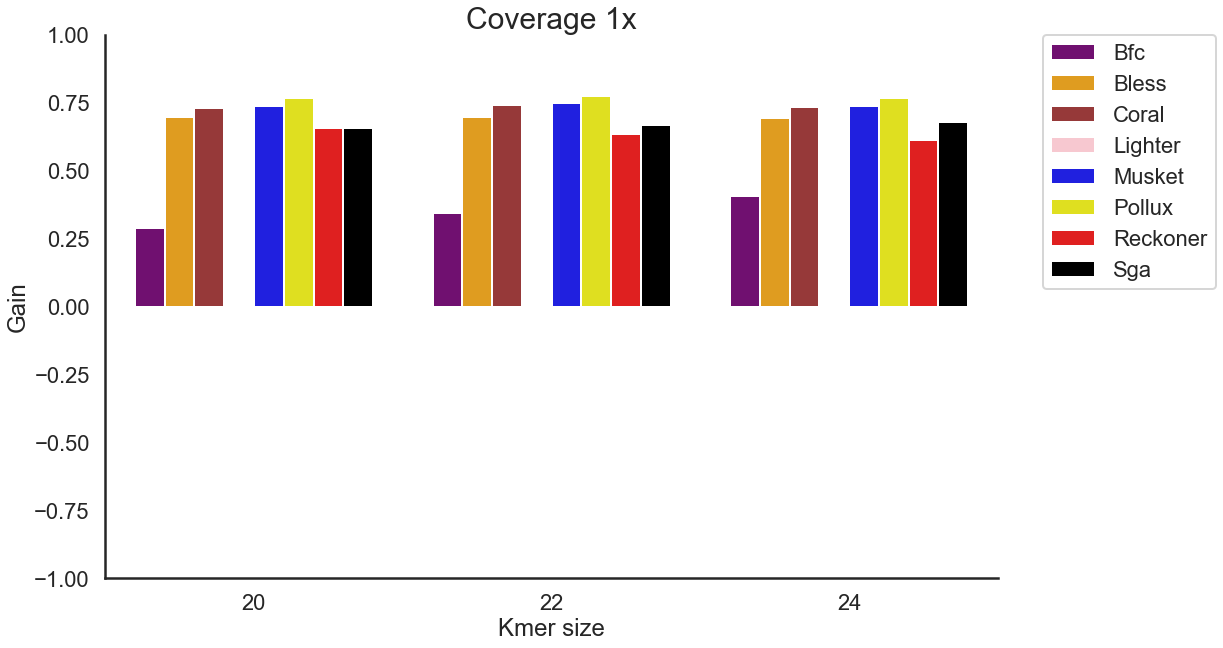

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Kmer Size", y="Base Gain",data = data[(data['Coverage'] ==1) & ((data['Tool'] !='Fiona')) & ((data['Tool'] !='Racer'))],hue='Tool', palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Gain')
g=plt.ylim( -1, 1)
g=plt.title("Coverage 1x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/TCRA_sim_human_kmers_gain_cov1.png", bbox_inches='tight')

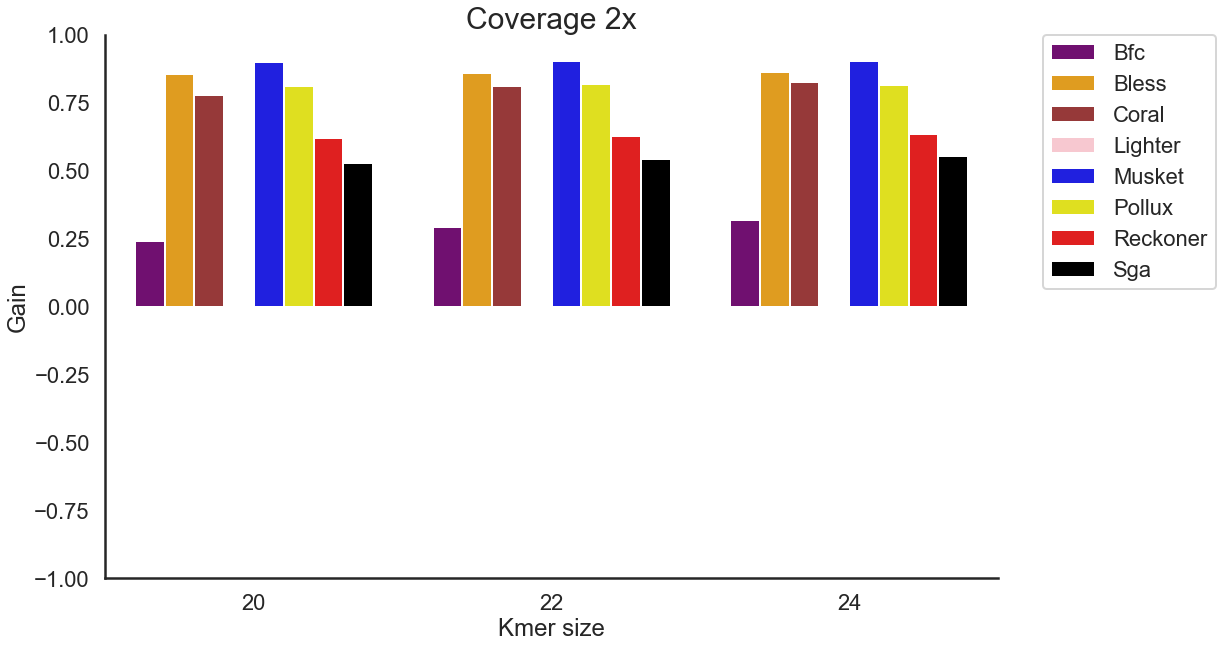

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Kmer Size", y="Base Gain",data = data[(data['Coverage'] ==2) & ((data['Tool'] !='Fiona')) & ((data['Tool'] !='Racer'))],hue='Tool', palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Gain')
g=plt.ylim( -1, 1)
g=plt.title("Coverage 2x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/TCRA_sim_human_kmers_gain_cov2.png", bbox_inches='tight')


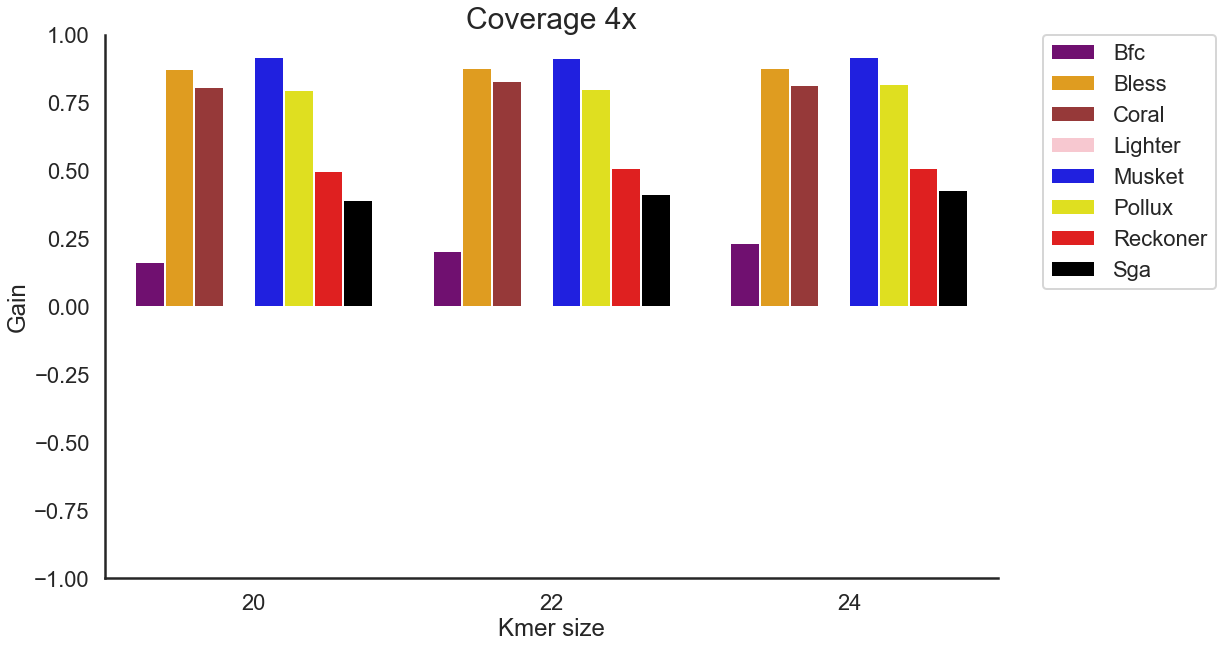

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Kmer Size", y="Base Gain",data = data[(data['Coverage'] ==4) & ((data['Tool'] !='Fiona')) & ((data['Tool'] !='Racer'))],hue='Tool', palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Gain')
g=plt.ylim( -1, 1)
g=plt.title("Coverage 4x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/TCRA_sim_human_kmers_gain_cov4.png", bbox_inches='tight')


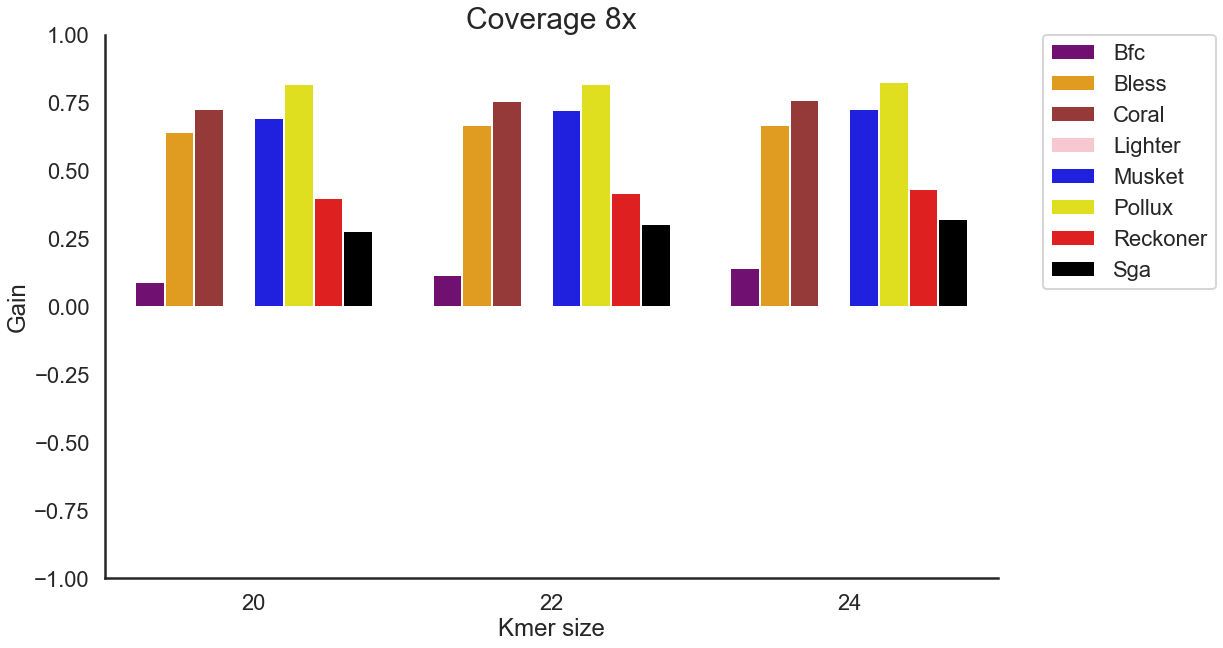

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Kmer Size", y="Base Gain",data = data[(data['Coverage'] ==8) & ((data['Tool'] !='Fiona')) & ((data['Tool'] !='Racer'))],hue='Tool', palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Gain')
g=plt.ylim( -1, 1)
g=plt.title("Coverage 8x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/TCRA_sim_human_kmers_gain_cov8.png", bbox_inches='tight')


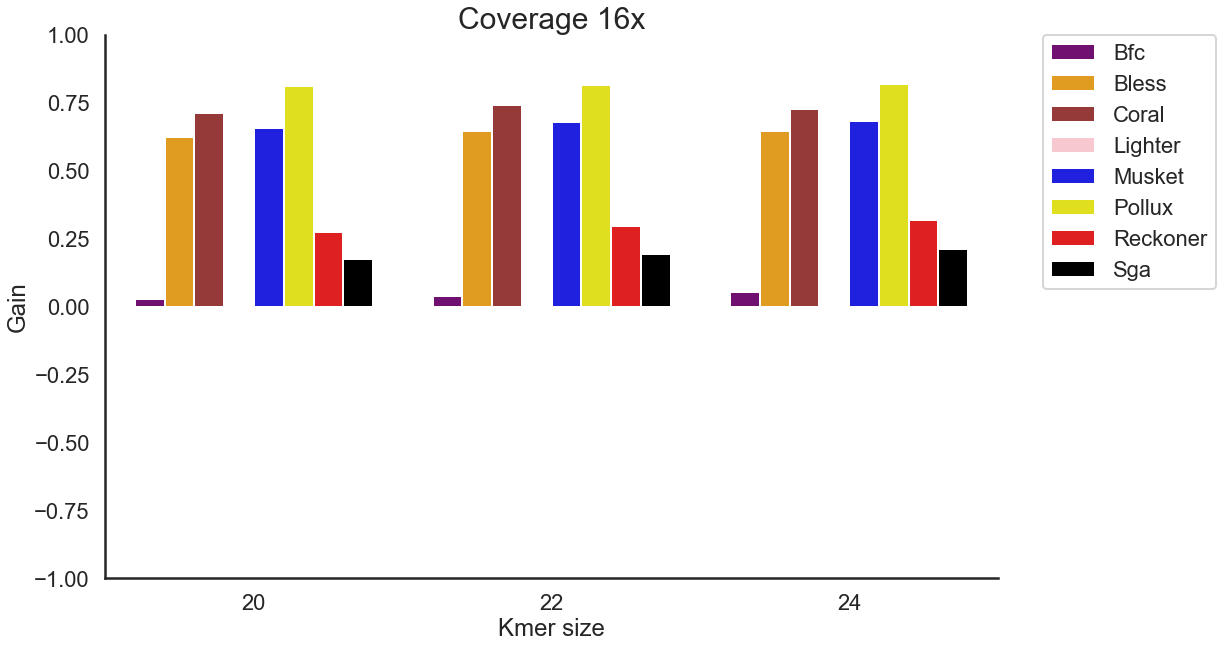

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Kmer Size", y="Base Gain",data = data[(data['Coverage'] ==16) & ((data['Tool'] !='Fiona')) & ((data['Tool'] !='Racer'))],hue='Tool', palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Gain')
g=plt.ylim( -1, 1)
g=plt.title("Coverage 16x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/TCRA_sim_human_kmers_gain_cov16.png", bbox_inches='tight')


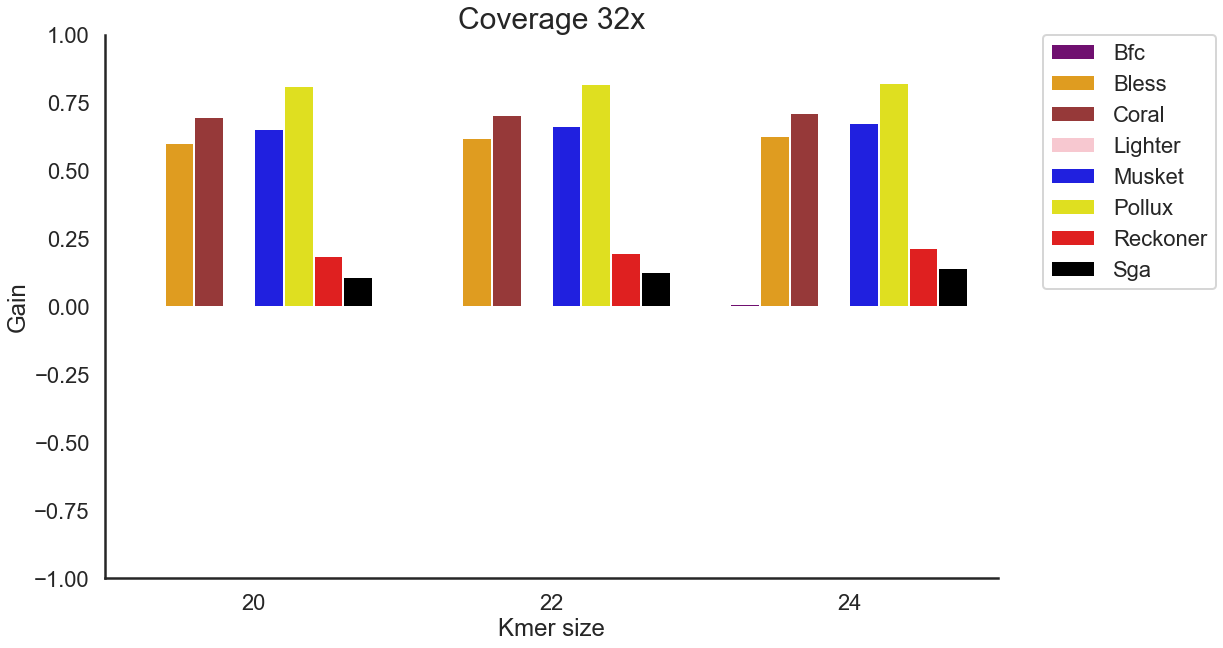

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Kmer Size", y="Base Gain",data = data[(data['Coverage'] ==32) & ((data['Tool'] !='Fiona')) & ((data['Tool'] !='Racer'))],hue='Tool', palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Gain')
g=plt.ylim( -1, 1)
g=plt.title("Coverage 32x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/TCRA_sim_human_kmers_gain_cov32.png", bbox_inches='tight')


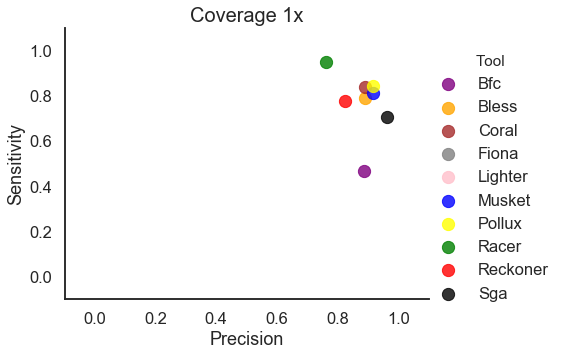

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data[(data['Coverage'] == 1) & (data['Kmer Size'] == 24)] , x='Base Precision', y='Base Sensitivity', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Precision', ylabel='Sensitivity')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=plt.title("Coverage 1x", fontsize=20)

g=sns.despine()
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov32.png")
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov32.pdf")

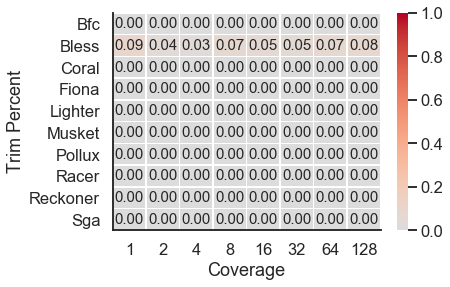

In [12]:
result = data[(data['Kmer Size'] ==24)].pivot(index='Tool', columns='Coverage', values='Trim Percent')
result=result.fillna(0)


import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.heatmap(result, annot=True, cmap='coolwarm',center=0,linewidths=.5,annot_kws={'size':15},fmt=".2f",vmin=0, vmax=1)

g.set(xlabel='Coverage', ylabel='Trim Percent')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/WGS_human/heatmap_humna_sensitivity.png",bbox_inches="tight")
plt.savefig("../figures/WGS_human/heatmap_human_sensitivity.pdf",bbox_inches="tight")

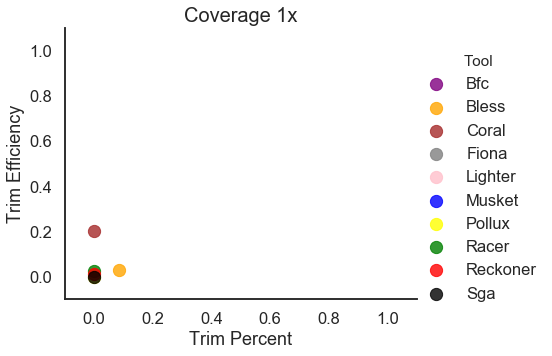

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data[(data['Coverage'] == 1) & (data['Kmer Size'] == 24)] , x='Trim Percent', y='Trim Effeciency', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Trim Percent', ylabel='Trim Efficiency')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=plt.title("Coverage 1x", fontsize=20)

g=sns.despine()
plt.savefig("../figures/TCRA_simulated/lmplot_efficiency_vs_percent_cov1.png")
plt.savefig("../figures/TCRA_simulated/lmplot_efficiency_vs_percent_cov1.pdf")

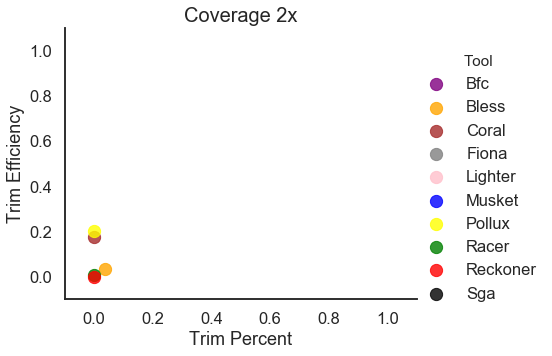

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data[(data['Coverage'] == 2) & (data['Kmer Size'] == 24)] , x='Trim Percent', y='Trim Effeciency', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Trim Percent', ylabel='Trim Efficiency')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=plt.title("Coverage 2x", fontsize=20)

g=sns.despine()
plt.savefig("../figures/TCRA_simulated/lmplot_efficiency_vs_percent_cov2.png")
plt.savefig("../figures/TCRA_simulated/lmplot_efficiency_vs_percent_cov2.pdf")

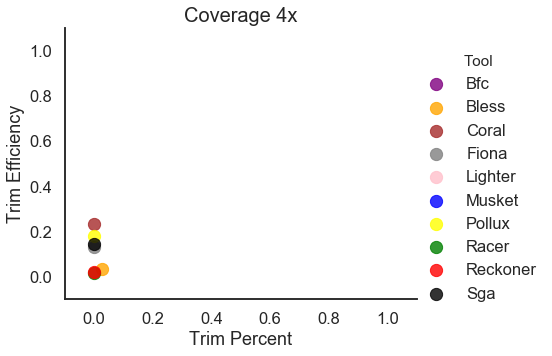

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data[(data['Coverage'] == 4) & (data['Kmer Size'] == 24)] , x='Trim Percent', y='Trim Effeciency', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Trim Percent', ylabel='Trim Efficiency')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=plt.title("Coverage 4x", fontsize=20)

g=sns.despine()
plt.savefig("../figures/TCRA_simulated/lmplot_efficiency_vs_percent_cov4.png")
plt.savefig("../figures/TCRA_simulated/lmplot_efficiency_vs_percent_cov4.pdf")

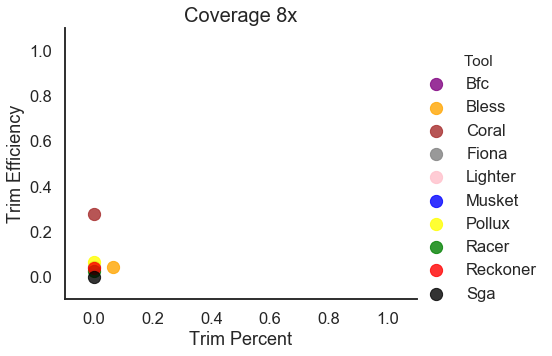

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data[(data['Coverage'] == 8) & (data['Kmer Size'] == 24)] , x='Trim Percent', y='Trim Effeciency', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Trim Percent', ylabel='Trim Efficiency')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=plt.title("Coverage 8x", fontsize=20)

plt.savefig("../figures/TCRA_simulated/lmplot_efficiency_vs_percent_cov8.png")
plt.savefig("../figures/TCRA_simulated/lmplot_efficiency_vs_percent_cov8.pdf")

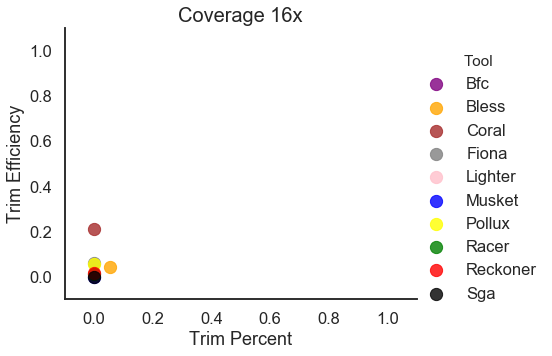

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data[(data['Coverage'] == 16) & (data['Kmer Size'] == 24)] , x='Trim Percent', y='Trim Effeciency', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Trim Percent', ylabel='Trim Efficiency')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=plt.title("Coverage 16x", fontsize=20)

plt.savefig("../figures/TCRA_simulated/lmplot_efficiency_vs_percent_cov16.png")
plt.savefig("../figures/TCRA_simulated/lmplot_efficiency_vs_percent_cov16.pdf")

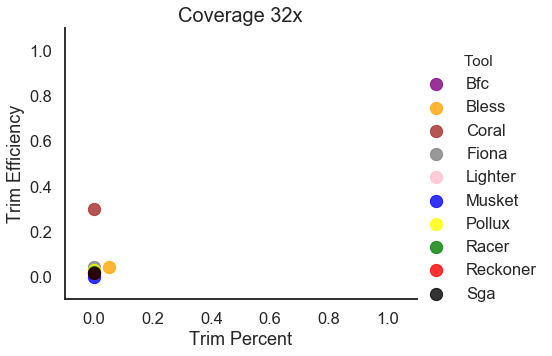

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data[(data['Coverage'] == 32) & (data['Kmer Size'] == 24)] , x='Trim Percent', y='Trim Effeciency', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Trim Percent', ylabel='Trim Efficiency')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=plt.title("Coverage 32x", fontsize=20)

plt.savefig("../figures/TCRA_simulated/lmplot_efficiency_vs_percent_cov32.png")
plt.savefig("../figures/TCRA_simulated/lmplot_efficiency_vs_percent_cov32.pdf")

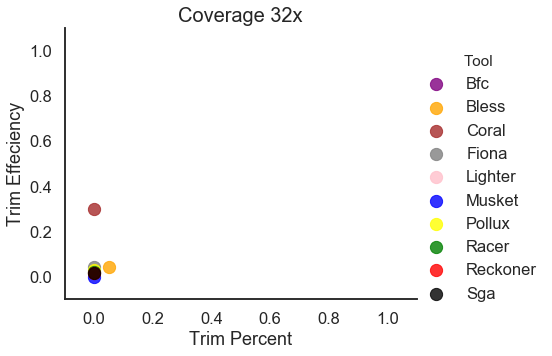

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data[(data['Coverage'] == 32) & (data['Kmer Size'] == 24)] , x='Trim Percent', y='Trim Effeciency', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Trim Percent', ylabel='Trim Effeciency')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=plt.title("Coverage 32x", fontsize=20)

g=sns.despine()
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov32.png")
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov32.pdf")

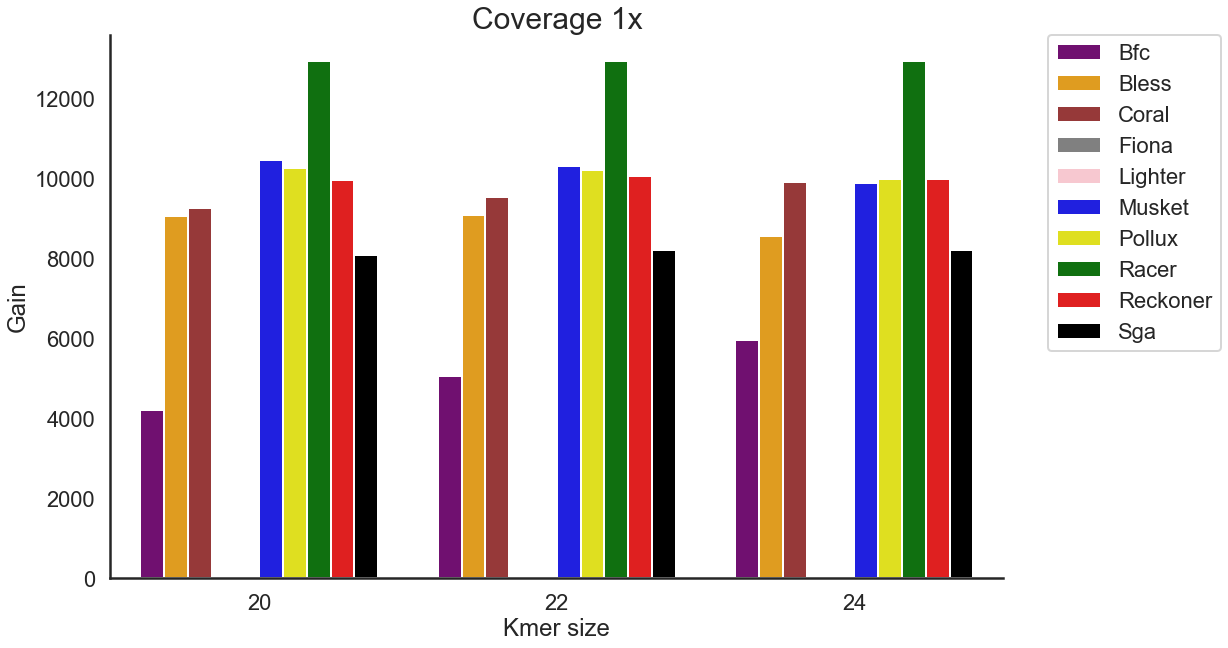

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Kmer Size", y="total_corrections",data = data[(data['Coverage'] ==1)],hue='Tool', palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Gain')
#g=plt.ylim(-1, 1)
g=plt.title("Coverage 1x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov1.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov1.pdf", bbox_inches='tight')

In [16]:
print(data.columns)

Index(['Unnamed: 0', 'EC Filename', 'Wrapper Name', 'Kmer Size', 'Read - TP',
       'Read - TN', 'Read - FN', 'Read - FN WRONG', 'Read - FP',
       'Read - FP INDEL', 'Total Trimmed Reads', 'Total Reads', 'Base - TP',
       'Base - TN', 'Base - FN', 'Base - FN WRONG', 'Base - FP',
       'Base - FP INDEL', 'Base - FP TRIM', 'Base - TP TRIM', 'Total Bases',
       'Tool', 'Coverage', 'Length', 'Base Sensitivity', 'Base Precision',
       'Base Gain', 'Base Accuracy', 'Dataset', 'Trim Percent',
       'Trim Effeciency', 'total_corrections'],
      dtype='object')


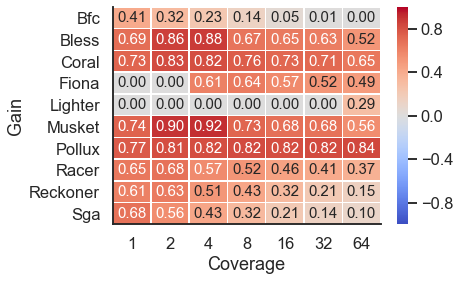

In [17]:
result = data[(data['Kmer Size'] ==24) & (data['Coverage'] <128)].pivot(index='Tool', columns='Coverage', values='Base Gain')
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.heatmap(result, annot=True, cmap='coolwarm',center=0,linewidths=.5,annot_kws={'size':15},fmt=".2f",vmin=-1, vmax=1)

g.set(xlabel='Coverage', ylabel='Gain')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/TCRA_simulated/heatmap_humna_gain.png",bbox_inches="tight")
plt.savefig("../figures/TCRA_simulated/heatmap_human_gain.pdf",bbox_inches="tight")

#supplementary.sx



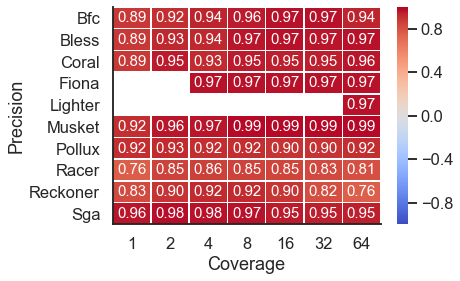

In [18]:
result = data[(data['Kmer Size'] ==24) & (data['Coverage'] <128)].pivot(index='Tool', columns='Coverage', values='Base Precision')
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.heatmap(result, annot=True, cmap='coolwarm',center=0,linewidths=.5,annot_kws={'size':15},fmt=".2f",vmin=-1, vmax=1)

g.set(xlabel='Coverage', ylabel='Precision')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/TCRA_simulated/heatmap_humna_precision.png",bbox_inches="tight")
plt.savefig("../figures/TCRA_simulated/heatmap_humna_precision.pdf",bbox_inches="tight")

#supplementary.sx



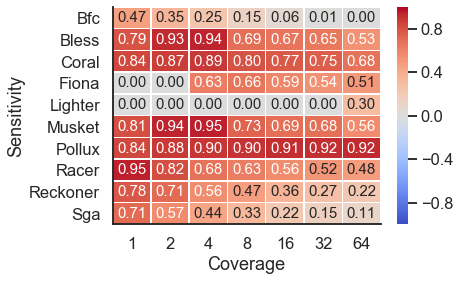

In [19]:
result = data[(data['Kmer Size'] ==24) & (data['Coverage'] <128)].pivot(index='Tool', columns='Coverage', values='Base Sensitivity')
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.heatmap(result, annot=True, cmap='coolwarm',center=0,linewidths=.5,annot_kws={'size':15},fmt=".2f",vmin=-1, vmax=1)

g.set(xlabel='Coverage', ylabel='Sensitivity')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/TCRA_simulated/heatmap_humna_sensitivity.png",bbox_inches="tight")
plt.savefig("../figures/TCRA_simulated/heatmap_humna_sensitivity.pdf",bbox_inches="tight")

#supplementary.sx
